## We can use both 'scipy library' and 'Python Control System Library(control)' for solving the system control problems; however, the control system library is more efficient.

In [3]:
import control
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt 

In [4]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

## 1. Scipy Library

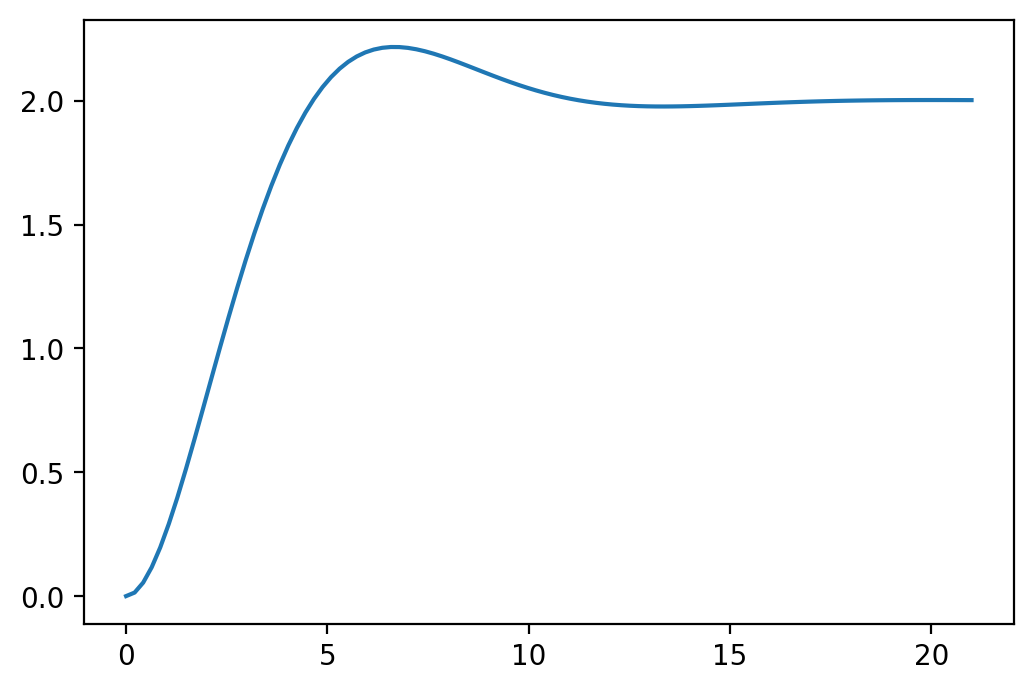

In [21]:
num = np.array([2])
den = np.array([3 ,2 , 1])


H = signal.TransferFunction(num , den)


# step respone 
t_1 , y_1 = signal.step(H)

plt.plot(t , y)

plt.show()


## 2. Python Control System Library

In [2]:
# F(s) = 7 / 17s^2 + s + 6

num = np.array([7])
den = np.array([17 , 1 , 6])

TF = control.tf(num , den)


# Method 1
print("Transfer Function = F(S) = \n" , TF)

# Mehod 2
TF

Text(0, 0.5, 'Output(y)')

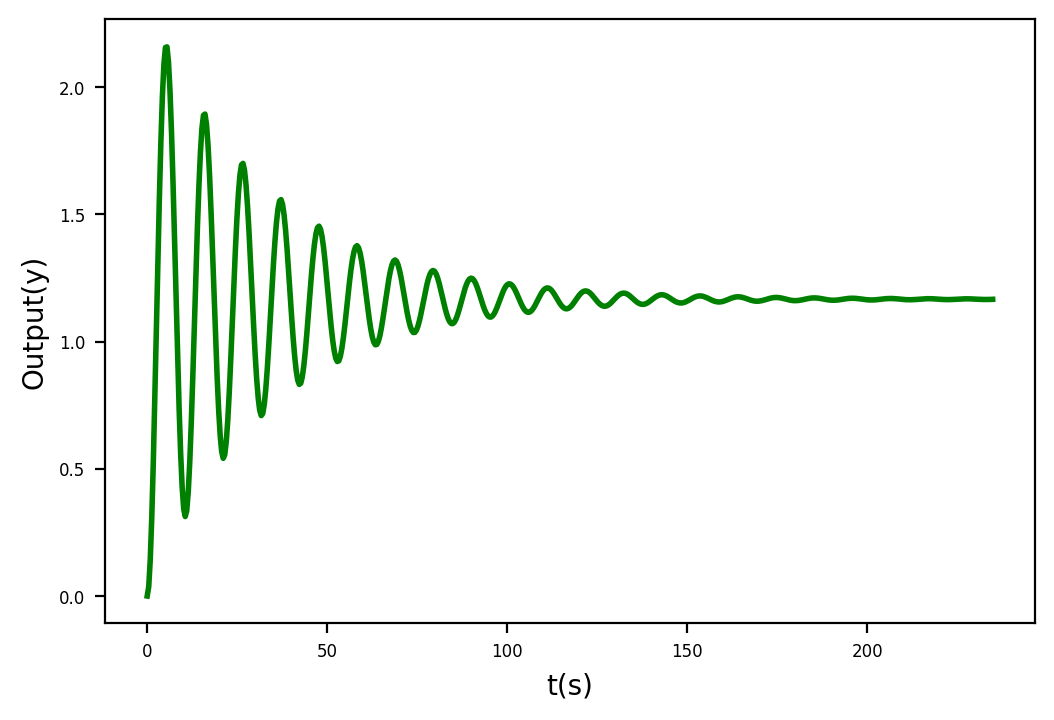

In [41]:
# Step Response
t_2, y_2 = control.step_response(TF)
 

# Plot the response
plt.plot(t_2 , y_2 , color = "g" , linewidth = 2)

plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel("t(s)" , fontsize = 10)
plt.ylabel("Output(y)" , fontsize = 10)


In [45]:
# Another way to define the transfer function(Using Laplace operator)

s = control.TransferFunction.s

TF_2 = (6*s + 1) / (s**2 + 4*s + 8)

TF_2

TransferFunction(array([6, 1]), array([1, 4, 8]))

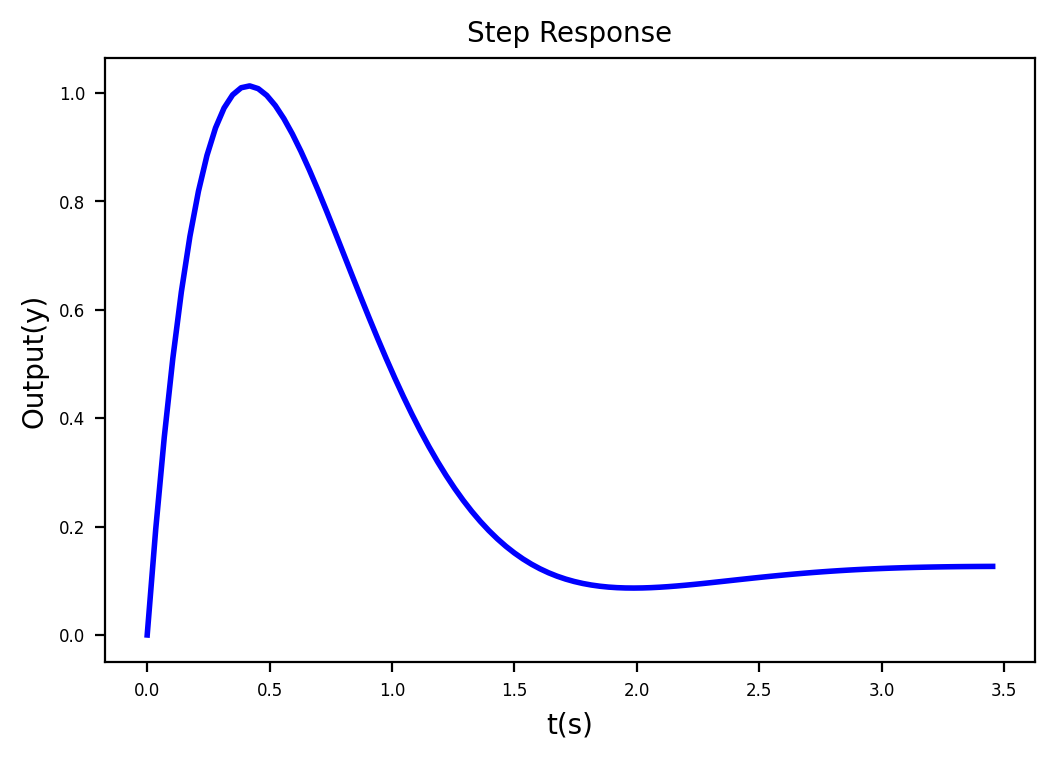

In [49]:
t_3 , y_3 = control.step_response(TF_2)

plt.plot(t_3 , y_3 , color = "b" , linewidth = 2)

plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel("t(s)" , fontsize = 10)
plt.ylabel("Output(y)" , fontsize = 10)
plt.title("Step Response" , fontsize = 10)




plt.show();

# Coursework 3

## Q1

In [32]:
#define the Laplace operator
s = control.TransferFunction.s


# obtained transfer function for the system
TF = (2 * (s + 7) * (s**2 + 2*s + 3) * (s + 2) * (s**2 + 5*s + 10) * (s + 6)) / (7 * (s**2 + 2*s + 16))

# Zeros of the System
Zeros = TF.zero()

# Poles of the system
Poles = TF.pole()

print("Zeros of the system:\n\n" , Zeros , "\n\n")

# poles of the System
print("Poles of the system:\n\n" , Poles)

Zeros of the system:

 [-7. +0.j         -6. +0.j         -2.5+1.93649167j -2.5-1.93649167j
 -2. +0.j         -1. +1.41421356j -1. -1.41421356j] 


Poles of the system:

 [-1.+3.87298335j -1.-3.87298335j]


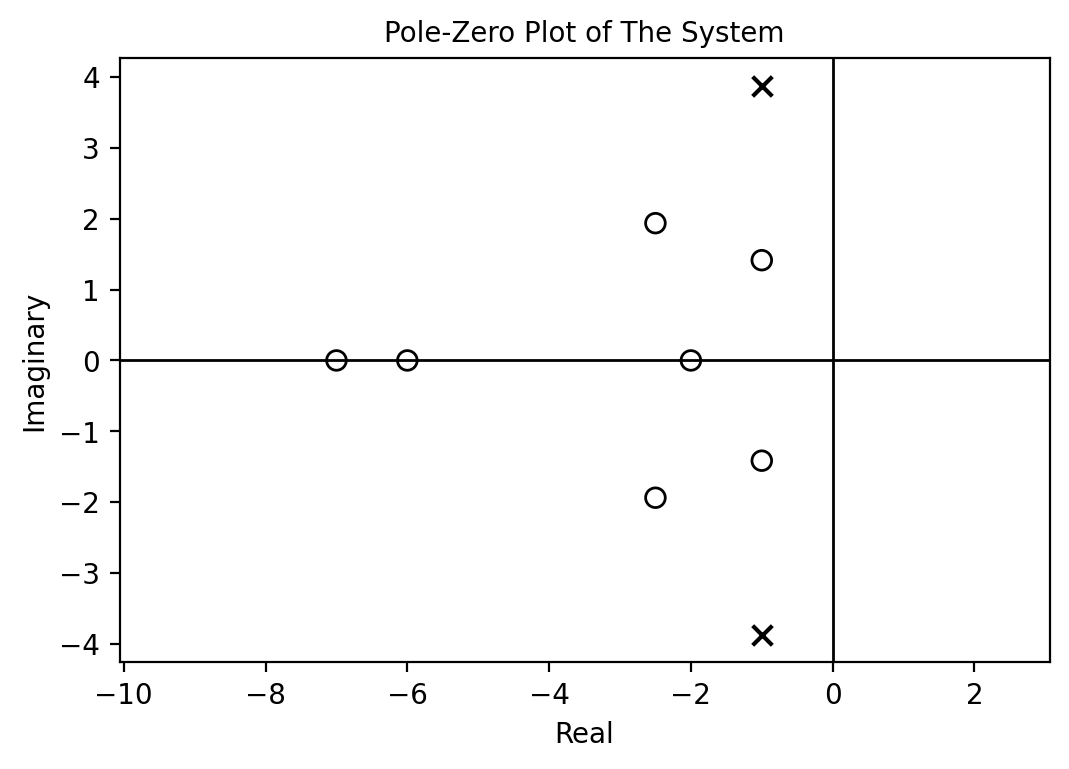

In [117]:
# pole-zero plot of the system

control.pzmap(TF);

plt.title("Pole-Zero Plot of The System" , fontsize = 10);

## Q3

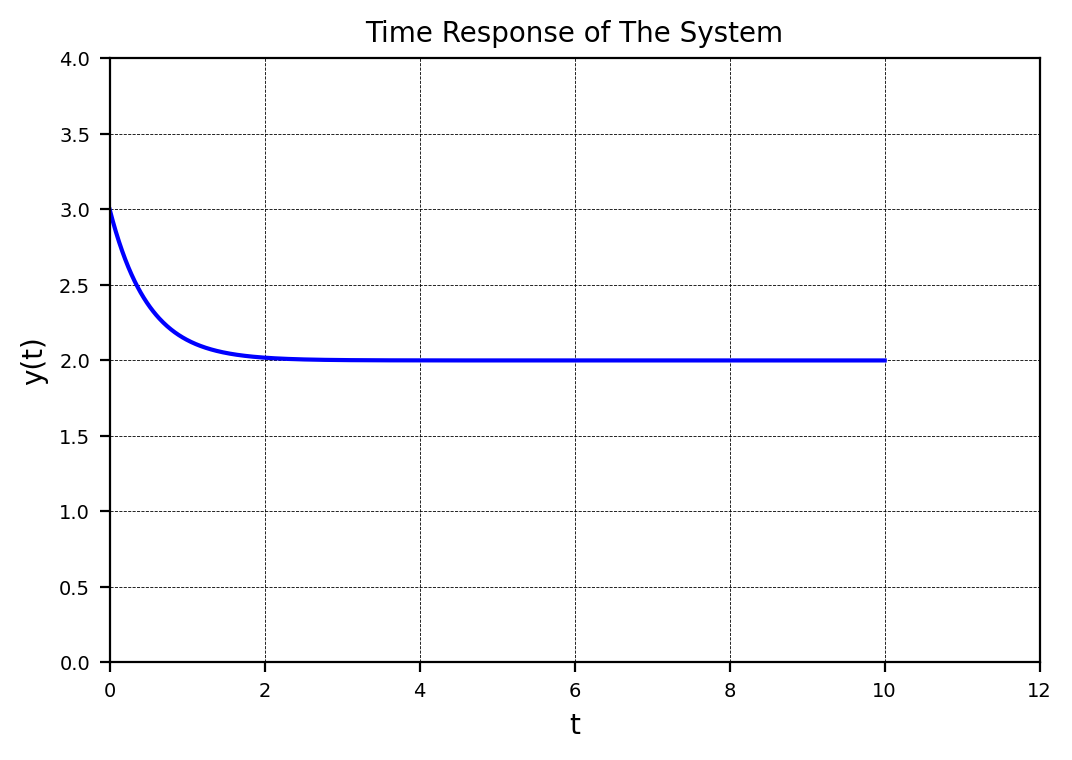

In [100]:
# plot the response of the system

t = np.linspace(0 , 10 , num = 1000)

plt.plot(t , 2 + np.exp(-2 * t) , color = 'b')


plt.ylim(0, 4)
plt.xlim(0 , 12)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.title("Time Response of The System" , fontsize = 10)
plt.grid(True, color = "black", linewidth = "0.3", linestyle = "--")
plt.show()


In [113]:
from scipy.signal import bessel , lsim , lsim2

In [120]:
A = np.array([[-1 , 0] , [2 , -2]])
B = np.array([[1] , [0]])
C = np.array([1 , 1])
D = 0

# Initial Condition
X_0 = np.array([[1] , [2]])

# Input Function
U = np.ones_like(t)

# State Space of The System
system_ss = control.ss(A , B , C , D)

In [121]:
print(system_ss)

A = [[-1.  0.]
     [ 2. -2.]]

B = [[1.]
     [0.]]

C = [[1. 1.]]

D = [[0.]]



# 

#

#

#

# Calculate the inverse of a matrix

In [39]:
import numpy as np

mat_1 = np.array([[1,2,9,1] , [4,12,6,7] , [87,8,9,2], [90,10,9,6]]) 
mat_2 = np.matrix([[1,2,9] , [4,12,6] , [87,8,9]]) # Another way to define matrices

##############################################################
# Matrix inverse
inv_mat_1 = np.linalg.inv(mat_1)
print("matrix Inverse:\n\n" , inv_mat_1)

##############################################################
# Matrix Determinant
det_mat_1 = np.linalg.det(mat_1)
print("\n\nMatrix Determinant = " , det_mat_1 , "\n\n")

##############################################################
eig_val , eig_vec = np.linalg.eig(mat_1)

print("Eigen Values = " , eig_val , "\n\n")
print("Eigen Vectors = " , eig_vec , "\n\n")






matrix Inverse:

 [[-0.00592326 -0.00849858  0.00103013  0.01055885]
 [-0.09000773  0.13172805  0.21130569 -0.20911666]
 [ 0.12627693 -0.0217186  -0.00746845  0.0067817 ]
 [ 0.0494463  -0.05949008 -0.35642544  0.3466392 ]]


Matrix Determinant =  -23297.999999999985 


Eigen Values =  [ 40.42496429 -23.9981963    8.86387018   2.70936183] 


Eigen Vectors =  [[ 0.17276019  0.2585529   0.08339232  0.03621741]
 [ 0.32579782  0.21098984 -0.94851195 -0.63532789]
 [ 0.60607948 -0.69417344  0.26716816  0.06263542]
 [ 0.7047534  -0.63777497  0.14829691  0.76884561]] 




#

#

# Method 2(matrix inverse)

In [43]:
def transposeMatrix(m):
    return list(map(list,zip(*m)))

def getMatrixMinor(m,i,j):
    return [row[:j] + row[j+1:] for row in (m[:i]+m[i+1:])]

def getMatrixDeternminant(m):
    #base case for 2x2 matrix
    if len(m) == 2:
        return m[0][0] * m[1][1]- m[0][1] * m[1][0]

    determinant = 0
    for c in range(len(m)):
        determinant += ((-1)**c)*m[0][c]*getMatrixDeternminant(getMatrixMinor(m,0,c))
    return determinant

def getMatrixInverse(m):
    determinant = getMatrixDeternminant(m)
    #special case for 2x2 matrix:
    if len(m) == 2:
        return [[m[1][1]/determinant, -1*m[0][1]/determinant],
                [-1*m[1][0]/determinant, m[0][0]/determinant]]

    #find matrix of cofactors
    cofactors = []
    for r in range(len(m)):
        cofactorRow = []
        for c in range(len(m)):
            minor = getMatrixMinor(m,r,c)
            cofactorRow.append(((-1)**(r+c)) * getMatrixDeternminant(minor))
        cofactors.append(cofactorRow)
    cofactors = transposeMatrix(cofactors)
    for r in range(len(cofactors)):
        for c in range(len(cofactors)):
            cofactors[r][c] = cofactors[r][c]/determinant
    return cofactors